# Gravitational lensing of a moving dark matter halo


In [4]:
import galsim
import matplotlib.pyplot as plt
import numpy as np
    

In [5]:
#(optional) set the text font to Latex font. 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer modern"],  # You can change the serif font here if needed
  #  "axes.labelsize": 14,     # Adjust as needed
   # "axes.linewidth": 0.5,    # Adjust line width if necessary
    #"xtick.labelsize": 12,    # Adjust tick label size
    #"ytick.labelsize": 12,    # Adjust tick label size
    "legend.fontsize": 12,    # Adjust legend font size
    "legend.handlelength": 2.0
})


In [6]:
#define the parameters of the galaxy
pixel_scale = 0.26 #arsec / pixel
nobj = 100 #number of galaxies
nfw_z_source = 0.6
image_size = 1200
gal_flux = 1.e7  # ADU
nfw_conc=1

nfw_z_halo=0.3
gal_r0=7.5

mass=1.e17 #absurdly large dark halo mass to be able to see the GL effects

<Figure size 1500x1500 with 0 Axes>

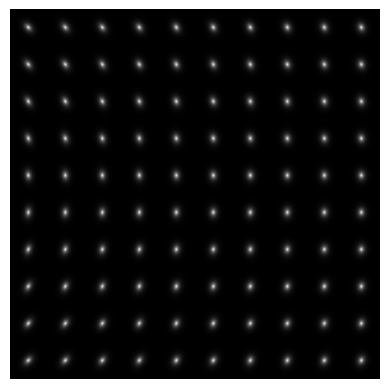

<Figure size 1500x1500 with 0 Axes>

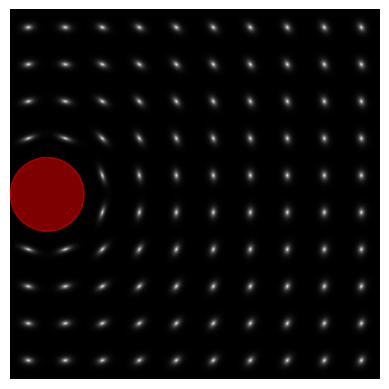

<Figure size 1500x1500 with 0 Axes>

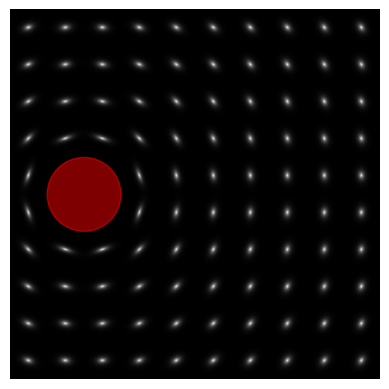

<Figure size 1500x1500 with 0 Axes>

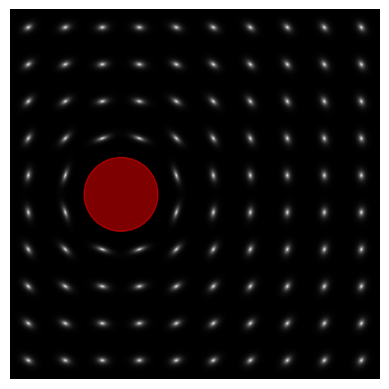

<Figure size 1500x1500 with 0 Axes>

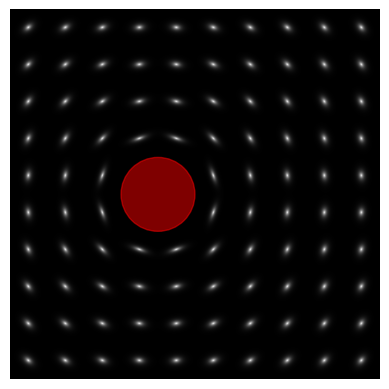

<Figure size 1500x1500 with 0 Axes>

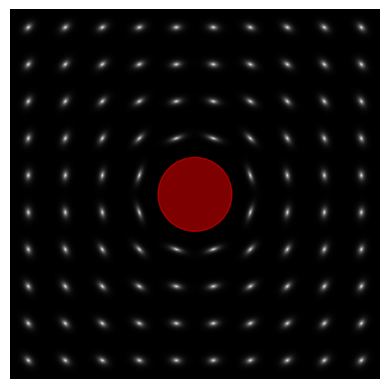

<Figure size 1500x1500 with 0 Axes>

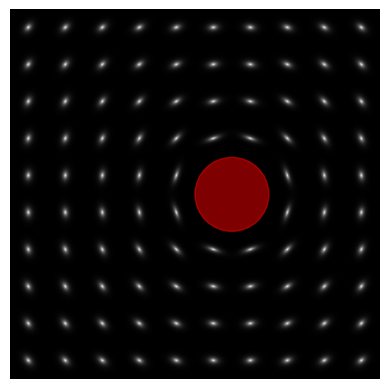

<Figure size 1500x1500 with 0 Axes>

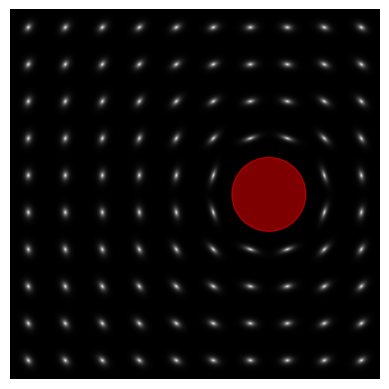

<Figure size 1500x1500 with 0 Axes>

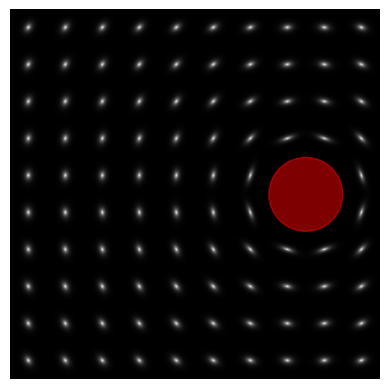

<Figure size 1500x1500 with 0 Axes>

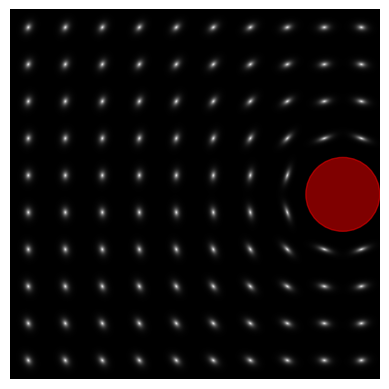

<Figure size 1500x1500 with 0 Axes>

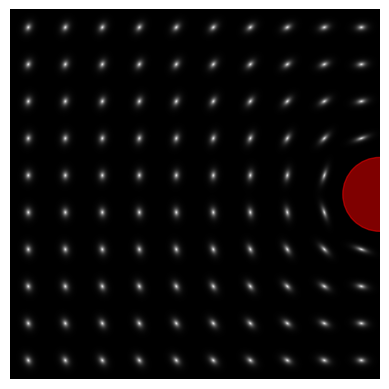

IndexError: list index out of range

In [7]:
#define the translation of the center of the halo
pos_x=[-0.5]
for i in range(int(np.sqrt(nobj))):
    pos_x.append(1*((i+0.5)/np.sqrt(nobj)))

#define the galaxy profile

def galaxy(x,y,source):
    
    gal= galsim.Exponential(flux=gal_flux, scale_radius=gal_r0)
    pos = galsim.PositionD(x*image_size, y*image_size)
    image_pos = wcs.toImage(galsim.PositionD((x-0.5)*image_size, (y-0.5)*image_size))
    local_wcs = wcs.local(image_pos)
    
    try:
        g1, g2 = nfw.getShear(pos, source)
        nfw_shear = galsim.Shear(g1=g1, g2=g2)
    except Exception as e:
        print(f"Warning: NFWHalo shear is invalid -- probably strong lensing! Using shear = 0. Error: {e}")
        nfw_shear = galsim.Shear(g1=0, g2=0)

    
    gal = gal.shear(nfw_shear)


    return gal,local_wcs, pos, nfw_shear


for i in range(0,len(pos_x)+1):
    
    full_image = galsim.ImageF(image_size, image_size, scale=pixel_scale)
    im_center = full_image.true_center

    nfw = galsim.NFWHalo(mass=mass, conc=nfw_conc, redshift=nfw_z_halo, halo_pos=galsim.PositionD((2*pos_x[i]+0.1)*image_size/2, image_size*(0.45+0.55)/2))


    #functions transformation to wcs
    ufunc = 'x'#'0.05 * x * (1. + 2.e-6 * (x**2 + y**2))'
    vfunc = 'y'#'0.05 * y * (1. + 2.e-6 * (x**2 + y**2))'
    #functions transformation to coordinates x,y
    xfunc = ('( lambda w: ( 0 if w==0 else ' + '100.*u/w*(( 5*(w**2 + 5.e3/27.)**0.5 + 5*w )**(1./3.) - ' + '( 5*(w**2 + 5.e3/27.)**0.5 - 5*w )**(1./3.))))( (u**2+v**2)**0.5 )')
    yfunc = ('( lambda w: ( 0 if w==0 else ' + '100.*v/w*(( 5*(w**2 + 5.e3/27.)**0.5 + 5*w )**(1./3.) - ' + '( 5*(w**2 + 5.e3/27.)**0.5 - 5*w )**(1./3.))))( (u**2+v**2)**0.5 )')
    wcs = galsim.UVFunction(ufunc, vfunc, xfunc, yfunc, origin=im_center)
    full_image.wcs = wcs

#remove the galaxies inside the halo (or only print the galaxies outside the halo)    
    for x in pos_x:
            for y in pos_x:
                if round(x,2) == round(pos_x[i],2) and (y == 0.45 or y==0.55): 
                    continue
                if round(x,2)== round(pos_x[i]+0.10,2) and (y == 0.45 or y==0.55):  
                    continue
                else:
                    gal, local_wcs, pos, nfw_shear = galaxy(x, y, nfw_z_source)
                    gal.drawImage(wcs=local_wcs, center=pos, image=full_image, method='auto', add_to_image=True)


    plt.figure(figsize=(15,15))
    fig, ax=plt.subplots()
    
    circle = plt.Circle(((pos_x[i]+pos_x[i]+0.10)*image_size/2, image_size*(0.45+0.55)/2), 120, color='r', alpha=0.5)
    ax.add_patch(circle)

    plt.imshow(full_image.array, cmap='binary_r')
    plt.axis('off')
    #plt.savefig("%02d"%i+".png", bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    